In [1]:
import numpy as np

X = []
Y = []
for line in open("iris.data", "r"):
    line = line.rstrip()
    if line == "": continue

    *x, y = line.split(",")
    x = [float(i) for i in x]
    X.append(x)
    Y.append(y)
    

labels = list(set(Y))
Y = [labels.index(y) for y in Y]

X = np.array(X)
Y = np.array(Y)

In [2]:
print(Y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


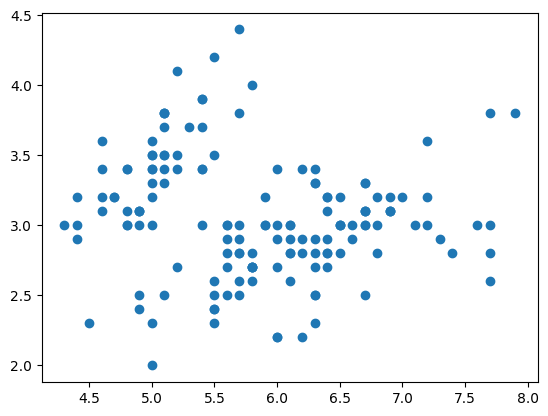

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])
plt.show()


In [4]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X, Y):
        self.X = X
        self.Y = Y

    def predict(self, queries):
        Y = []
        for q in queries:
            dists = np.linalg.norm(self.X - q, axis = 1)
            knns= np.argsort(dists)[:self.k]
            counts = np.bincount(self.Y[knns])
            Y.append(np.argmax(counts))

        return np.array(Y)

In [5]:
perm = np.random.permutation(len(X))
n_trains = int(len(X) * 0.8)
X_train = X[perm[:n_trains]]
Y_train = Y[perm[:n_trains]]
X_test = X[perm[n_trains:]]
Y_test = Y[perm[n_trains:]]

knn = KNNClassifier(5)
knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print("Train accuracy:", (pred_train == Y_train).mean())
print("Test accuracy:", (pred_test == Y_test).mean())

Train accuracy: 0.975
Test accuracy: 1.0


In [6]:
def cross_val_score(knn, X, Y, cv):
    n = len(X)
    perm = np.random.permutation(n)
    X = X[perm]
    Y = Y[perm]
    scores = []
    
    for i in range(cv):
        start = i * n // cv
        end = (i + 1) * n // cv
        
        X_train = np.concatenate([X[:start], X[end:]])
        Y_train = np.concatenate([Y[:start], Y[end:]])
        
        X_test = X[start:end]
        Y_test = Y[start:end]
        
        knn.fit(X_train, Y_train)
        pred = knn.predict(X_test)
        scores.append((pred == Y_test).mean())
        
    return np.array(scores)
knn = KNNClassifier(5)
scores = cross_val_score(knn, X, Y, 10)
print(scores.mean())

0.96


<function matplotlib.pyplot.show(close=None, block=None)>

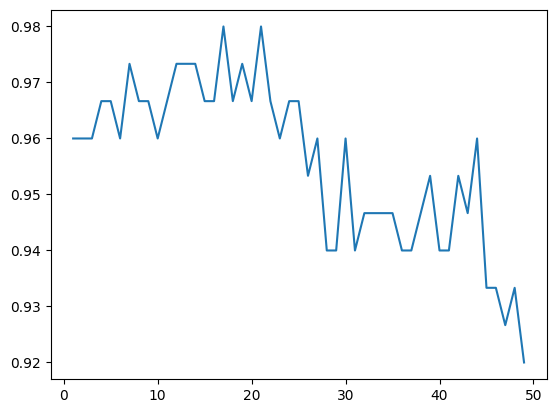

In [7]:
scores = []
test_scores = []

for k in range(1, 50):
    knn = KNNClassifier(k)
    score = cross_val_score(knn, X, Y, 10).mean()
    scores.append(score)
    
plt.plot(range(1, 50), scores)
plt.show

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("train accuracy:", accuracy_score(y_train_pred, y_train))
print("test accuracy:", accuracy_score(y_test_pred, y_test))


train accuracy: 0.975
test accuracy: 1.0


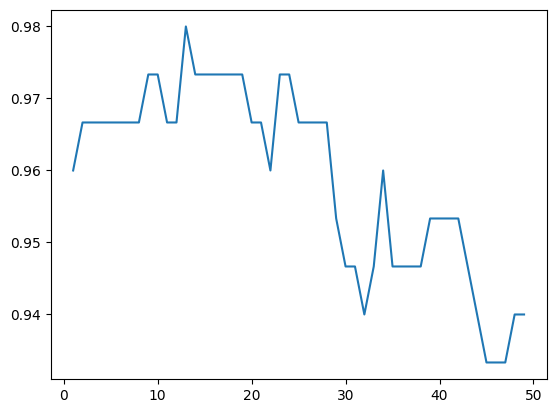

In [9]:
from sklearn.model_selection import cross_val_score
scores = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=10, scoring="accuracy").mean()
    scores.append(score)
plt.plot(range(1, 50), scores)
plt.show()